## Verify Python 3

In [1]:
import sys

if sys.version_info[0] < 3:
    raise "Must be using Python 3"
else:
    print("Alrite! We are using Python "+str(sys.version_info[0]))

Alrite! We are using Python 3


## Install OMXWare

In [ ]:
!echo 'y' | pip uninstall omxware

#Install OMXWare client
!pip install --no-cache-dir omxware 

#Install PrettyPrint
!pip install --no-cache-dir pprint

#Install py4j to use Dynamic forms
!pip install --no-cache-dir py4j

#Install panda
!pip install --no-cache-dir pandas

In [3]:
!pip show omxware

Name: omxware
Version: 0.1.38
Summary: IBM Functional Genomics Platform SDK to explore data.
Home-page: https://github.ibm.com/GrandChallenge-Almaden/omxware-pypi
Author: Harsha Krishnareddy
Author-email: hvkrishn@us.ibm.com
License: IBM
Location: /home/vader/Projects/python3_env/lib/python3.7/site-packages
Requires: urllib3, pprint, requests, IPython, pandas, python-keycloak, pycrypto, simplejson, configparser, matplotlib
Required-by: 


### Import OMXWare and initialize

In [4]:
%matplotlib inline

import json
import pprint
pp = pprint.PrettyPrinter(indent=4)

from IPython.display import display

import omxware


# --- Authentication options --- #
# generate token with OMXWare user name and password (likely done once and then stored in file, see usage below)
token = omxware.get_token('username', 'password') # fill in password to initiate token

# or

# use previously generated token loaded from file
# token_path = "./omxware_collaborative_work/super_awesome_token"  # update for your path to the token file you create
# f = open(token_path)
# token = f.readline()

# provide your token to authenticate with OMXWare
omx = omxware.omxware(token)

In [3]:
# help(omx)

#### Genomes for Genus: 'Abiotrophia'

In [7]:
# Get Genus object for genus_name = 'abiotrophia'
genus = omx.genus(genus_names='abiotrophia').results()[0]

# Get Genomes for the Genus ^^^^^^^^
genomes_for_genus = genus.genomes()
g4gdf = genomes_for_genus.results(type='df')[['genera','genome_type','id','taxid']]

display(g4gdf)

,genera,genome_type,id,taxid
0,[abiotrophia],SRA,SRR1922824,46123
1,[abiotrophia],SRA,DRR015936,46123


### Get Genome by its ID

In [5]:
genome_id = 'SRR1922824'

genome = omx.genomes(ids=genome_id).results()[0]

# For the Genome ^^^^^^^^^^^
id = genome.id()
typ = genome.genome_type()
taxid = genome.taxid()
metadata = genome.metadata('biosample')

genera = genome.genus().results()

print('ID: ' + id)
print('Type: ' + typ)
print('TaxID: ' + taxid)
print('BioSample: ' + str(metadata)[:100])
print('Genera: ' + str(genera))




ID: SRR1922824
Type: SRA
TaxID: 46123
BioSample: {'strain': 'HMSC24B09', 'access': 'public', 'owner_name': 'Washington University, Genome Sequencing 
Genera: [<omxware.entities.Genus.Genus object at 0x1115e5080>]


### Get Genes for a Genome

In [10]:
genes = genome.genes(page_number=1, page_size=10)

### Distribution of Genes by Genera

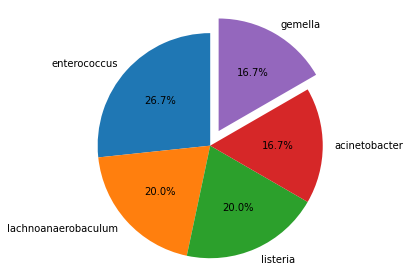

In [11]:
genes.show_facets(name='genera', topN=5)

### Get the Genes

In [12]:
gene_results = genes.results(type='df')
display(gene_results)

,id,name,type,genera,genomes,sequence_length,status,omx_creation_ts,omx_modified_ts,classification
0,bb6773978c3516d73999fb9bc17909c9,putative ABC transporter ATP-binding protein,gene,[abiotrophia],[SRR1922824],1587,active,2018-02-28T17:30:34.233Z,2018-02-28T17:30:34.233Z,[bacteria]
1,7ab0cfaaa96a174eaf75c292d1fdcd64,L-fucose isomerase,gene,[abiotrophia],[SRR1922824],1767,active,2018-02-28T17:30:34.779Z,2018-02-28T17:30:34.779Z,[bacteria]
2,778dd7c8b21f8ab6314654d186b59517,50S ribosomal protein L9,gene,[abiotrophia],[SRR1922824],453,active,2018-02-28T17:30:34.216Z,2018-02-28T17:30:34.216Z,[bacteria]
3,1e62b56449072dad1cef95b1526a5428,"Glycerophosphodiester phosphodiesterase, cytop...",gene,[abiotrophia],[SRR1922824],1770,active,2018-02-28T17:30:34.011Z,2018-02-28T17:30:34.011Z,[bacteria]
4,fb83e21a8e707f4074c919bc85b8cffd,hypothetical protein,gene,"[abiotrophia, chlamydia, lachnoanaerobaculum, ...","[ERR045414, ERR045432, ERR048577, ERR052227, E...",369,active,2018-02-13T23:19:12.827Z,2019-09-29T09:18:41.858Z,[bacteria]
5,8b9403de60c4f475d13ff4d10dd302da,hypothetical protein,gene,[abiotrophia],[SRR1922824],255,active,2018-02-28T17:30:33.665Z,2018-02-28T17:30:33.665Z,[bacteria]
6,40d07a0c64d0df8a9c4515ba25781acc,hypothetical protein,gene,[abiotrophia],[SRR1922824],231,active,2018-02-28T17:30:34.227Z,2018-02-28T17:30:34.227Z,[bacteria]
7,850766878fc2971ec0ae96d41b42b512,hypothetical protein,gene,[abiotrophia],[SRR1922824],642,active,2018-02-28T17:30:33.514Z,2018-02-28T17:30:33.514Z,[bacteria]
8,c2a5337f88b671a22ed1eda0fbadb1ed,hypothetical protein,gene,[abiotrophia],[SRR1922824],1071,active,2018-02-28T17:30:35.391Z,2018-02-28T17:30:35.391Z,[bacteria]
9,c2d934fa0b886173dd6463017dd95229,Calcium-transporting ATPase 1,gene,[abiotrophia],[SRR1922824],2673,active,2018-02-28T17:30:35.567Z,2018-02-28T17:30:35.567Z,[bacteria]


### Get Genes as Fasta

In [13]:
gene_results_fasta = genes.results(type='fasta')
print(gene_results_fasta)

>OMX_gene_bb6773978c3516d73999fb9bc17909c9|putative ABC transporter ATP-binding protein
ATGAAACAGCTCATCAAACATTTTTGGAAGGAAAATCTCCTAATGCTAGTCATCTTGTTAGGTAATGCGCTCGCGCTAACGGCGACTAGCTTGATGCAAATTTTTATTTTAGATGCGCTTATTAGCTTAAATCTTATCAATTTTTTGCAGACGATGGGCTATTTATTGATGGCCTATTTGATAATGCTAGGAATGACTTACTTAAAAATAAGATATCAGAGCAAATTAATTCAGCAGCAAACAACCTTTCTACGGGTTAAAGTACTGAAAAAAATTAGCCAAATTAGCTATGAAGATTTCAAGTCTAAGGAATCTCAATCATATGTTTCTTGGTTCACCAATGATATGGACTTAATCGAAAAACAGTCTTTGGTTCCCCTGTATGCCTTGATAGGAGGAATTATTAATGCCATTACATCTGGAATTGCTCTCCTAACTATGCATTGGTCTTTAATTGTTTTAACGGCGAGTCTGGTTCTTGTATTACTTTTTATCCCCAAATTATTTTCTAGGAGGATGGAAGGTACCACTCGTCAAGTGGCTCAAGCAAATGAGGAATTCATACAGAAGATTGGTAACTATTTAATGGCCTATGATACAATTTTTTCTTATCGAAAGTTTTCTTATATTATCAAGAGGACAGAACAGGCATCAGATCATCTGGCTCAAGAAAAAAATAATTATCAGAAAGAAATTGGTTGGGTGACTGTGATAAGCGGTCTAGGAAATATATTGAGTCAGTTCTCTCTTTATGCTTTGACTGGTTATTTAGCAGTTCAACAAATCGTTACAATTGGTTCTTTATCAGCAACTGCTTCTTTAGCGGGTGATATTTTTAATACAGTAAGTAACATTAGCCAGTATCTTGCCATTATCAAGAGTAGCAAGCCTATTTTCGATAAATTTGAGGCA

### Get GO-terms and IPR-codes by Gene

In [14]:
genes = omx.genes(ids='921db25406f80e09c8f78dd915f355aa')
genes = genes.results()

gene = genes[0]
# print(gene)

display(gene.go().results(type='df'))
display(gene.ipr().results(type='df'))

,id,name,type,category,status,classification
0,GO:0006807,nitrogen compound metabolic process,go,BIOLOGICAL_PROCESS,active,[bacteria]
1,GO:0005737,cytoplasm,go,CELLULAR_COMPONENT,active,[bacteria]
2,GO:0003824,catalytic activity,go,MOLECULAR_FUNCTION,active,[bacteria]
3,GO:0006542,glutamine biosynthetic process,go,BIOLOGICAL_PROCESS,active,[bacteria]
4,GO:0009399,nitrogen fixation,go,BIOLOGICAL_PROCESS,active,[bacteria]
5,GO:0004356,glutamate-ammonia ligase activity,go,MOLECULAR_FUNCTION,active,[bacteria]


,id,name,type,category,description,status,classification
0,IPR008147,Gln_synt_b-grasp,ipr,DOMAIN,"Glutamine synthetase, beta-Grasp domain",active,[bacteria]
1,IPR008146,Gln_synth_cat_dom,ipr,DOMAIN,"Glutamine synthetase, catalytic domain",active,[bacteria]
2,IPR014746,Gln_synth/guanido_kin_cat_dom,ipr,HOMOLOGOUS_SUPERFAMILY,"Glutamine synthetase/guanido kinase, catalytic...",active,[bacteria]
3,IPR036651,Gln_synt_N,ipr,HOMOLOGOUS_SUPERFAMILY,"Glutamine synthetase, N-terminal domain superf...",active,[bacteria]
4,IPR004809,Gln_synth_I,ipr,FAMILY,Glutamine synthetase type I,active,[bacteria]


### Get Genome Assembly file

In [12]:
output_file_path = './omxware_collaborative_work/data/getting_started/' + genome.id() + '.txt'
# update above for your file system

genome.file(output_file_path=output_file_path)

'./omxware_collaborative_work/data/getting_started/SRR1922824.txt'

### Get 'biosample' metadata for the Genome

In [15]:
metadata_json = genome.metadata(type='biosample')
print(json.dumps(metadata_json, indent=4, sort_keys=True))
#indicates no biosample metadata present

null
